Part 1
In this activity, we will look at another example. Your task is to understand the problem and write down all the steps to set up ANOVA. After the next lesson, we will ask you to solve this problem using Python. Here are the steps that you would need to work on: - Null hypothesis - Alternate hypothesis - Level of significance - Test statistic - P-value - F table

Context
Suppose you are working as an analyst in a microprocessor chip manufacturing plant. You have been given the task of analyzing a plasma etching process with respect to changing Power (in Watts) of the plasma beam. Data was collected and provided to you to conduct statistical analysis and check if changing the power of the plasma beam has any effect on the etching rate by the machine. You will conduct ANOVA and check if there is any difference in the mean etching rate for different levels of power. You can find the data anova_lab_data.xlsx file in the files_for_lab folder

State the null hypothesis
State the alternate hypothesis
What is the significance level
What are the degrees of freedom of model, error terms, and total DoF
Data was collected randomly and provided to you in the table as shown: link to the image - Data

1- null hypothesis: Groups means are equal (no variation in means of groups) ----> µ_160 = µ_180 = µ_200
2- State the alternate hypothesis--> H1: All μ are not equal
3-What is the significance level ---> alpha = 0.05

In [15]:
#4- What are the degrees of freedom of model, error terms, and total DoF
etching_rate=[[5.43, 6.24, 8.79],
                  [5.71, 6.71, 9.2],
                  [6.22, 5.98, 7.9],
                  [6.01, 5.66, 8.15],
                  [5.59, 6.6, 7.55]]
etching_rate

[[5.43, 6.24, 8.79],
 [5.71, 6.71, 9.2],
 [6.22, 5.98, 7.9],
 [6.01, 5.66, 8.15],
 [5.59, 6.6, 7.55]]

In [16]:
import pandas as pd
df = pd.DataFrame(etching_rate)
df.columns  = ['160 W', '180 W', '200 W']
#df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['160 W', '180 W', '200 W'])
#df_melts
df

,160 W,180 W,200 W
0,5.43,6.24,8.79
1,5.71,6.71,9.20
2,6.22,5.98,7.90
3,6.01,5.66,8.15
4,5.59,6.60,7.55


In [18]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['160 W', '180 W', '200 W'])
# replace column names
df_melt.columns = ['index', 'power', 'etching_rate']

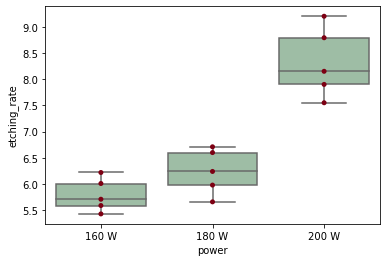

In [19]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='power', y='etching_rate', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="power", y="etching_rate", data=df_melt, color='#7d0013')
plt.show()

In [21]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['160 W'], df['180 W'], df['200 W'])
print('F statistic is: ',fvalue, 'and the p-valueis :',pvalue, )

F statistic is:  36.87895470100505 and the p-valueis : 7.506584272358903e-06


In [20]:
# part 2: In this section, use Python to conduct ANOVA.
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('etching_rate ~ C(power)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(power),18.176653,2.0,36.878955,0.000008
Residual,2.957240,12.0,NaN,NaN


In [ ]:
# What conclusions can you draw from the experiment and why?
0.000008 < 0.05 ---> p_value < alpha ---> H0 is false and rejected, and H1 is true ---> All μ are not equal